## Saturation analyses on the Lx

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
dir_Lx = '../out/20.0518 Lx/'
recall_cutoff = 0.95
Lx_range = [25,75,100,200,300]

In [191]:
def getPct(x, model_name, cutoff=0.95):
    # get the fraction of targets with recall > cutoff
    # given as is refering to Lx
    df_results = pd.read_csv('%s/L%sonly_reg_rf_boruta/model_results.csv' % (dir_Lx, x))
    
    #genes_pass = df_results.loc[df_results.score_test>0,'target']
    #genes_pass = df_results.loc[(df_results.score_train - df_results.score_test) < 0.1,'target']
    #df_results = df_results.loc[df_results.target.isin(set(genes_pass)),:].copy()
    
    df_results = df_results.loc[df_results.model == model_name,:].copy()
    n_total = df_results.shape[0]
    n_pass = sum(df_results.corr_test_recall > cutoff)
                
    return n_total, n_pass/n_total, np.nanmean(df_results.corr_test), np.nanmean(df_results.score_test), np.nanmean(df_results.score_train)


def getStats(model_name):
    df_stats = {'Lx':[], 'recall_pct':[], 'mean_corr':[], 'mean_R2_test':[], 'mean_R2_train':[], 'n':[]}
    for x in Lx_range:
        df_stats['Lx'].append(x)
        n, recall_pct, mean_corr, mean_R2_test, mean_R2_train = getPct(x, model_name, recall_cutoff)
        df_stats['recall_pct'].append(recall_pct)
        df_stats['mean_corr'].append(mean_corr)
        df_stats['mean_R2_test'].append(mean_R2_test)
        df_stats['mean_R2_train'].append(mean_R2_train)
        df_stats['n'].append(n)
    df_stats = pd.DataFrame(df_stats)
    return df_stats

#### based on reduced model top 10 feat

In [192]:
df_stats = getStats('top10feat')
df_stats

,Lx,recall_pct,mean_corr,mean_R2_test,mean_R2_train,n
0,25,0.246869,0.106354,-0.059472,0.239941,559
1,75,0.518315,0.226301,0.041199,0.349949,546
2,100,0.536449,0.236194,0.049812,0.359463,535
3,200,0.694818,0.299055,0.099621,0.404988,521
4,300,0.758000,0.346371,0.139522,0.502333,500


[Text(0,0.5,'% targets with recall > 0.95'), Text(0.5,0,'Lx')]

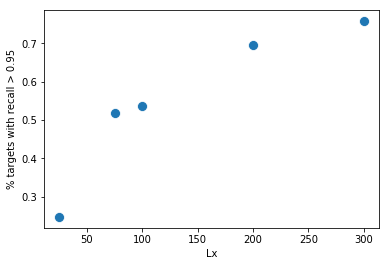

In [193]:
ax = sns.scatterplot(df_stats.Lx, df_stats.recall_pct, s=100)
ax.set(xlabel='Lx', ylabel='%% targets with recall > %s' % recall_cutoff)

[Text(0,0.5,'Mean correlation (rho)'), Text(0.5,0,'Lx')]

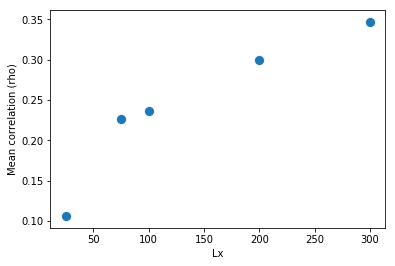

In [194]:
ax = sns.scatterplot(df_stats.Lx, df_stats.mean_corr, s=100)
ax.set(xlabel='Lx', ylabel='Mean correlation (rho)')

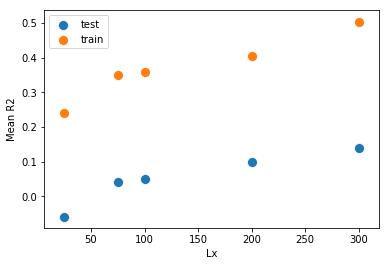

In [195]:
ax = sns.scatterplot(df_stats.Lx, df_stats.mean_R2_test, s=100)
ax = sns.scatterplot(df_stats.Lx, df_stats.mean_R2_train, s=100)
ax.set(xlabel='Lx', ylabel='Mean R2')
ax.legend(labels=['test', 'train'])

#### based on reduced model

In [196]:
df_stats = getStats('topfeat')
df_stats

,Lx,recall_pct,mean_corr,mean_R2_test,mean_R2_train,n
0,25,0.264758,0.111615,-0.057973,0.240618,559
1,75,0.529304,0.224617,0.041741,0.350896,546
2,100,0.538318,0.237213,0.051937,0.359600,535
3,200,0.679463,0.297754,0.098049,0.404863,521
4,300,0.754000,0.345809,0.140441,0.501915,500


[Text(0,0.5,'% targets with recall > 0.95'), Text(0.5,0,'Lx')]

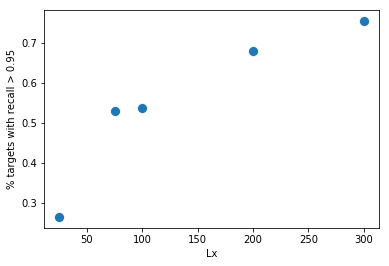

In [197]:
ax = sns.scatterplot(df_stats.Lx, df_stats.recall_pct, s=100)
ax.set(xlabel='Lx', ylabel='%% targets with recall > %s' % recall_cutoff)

[Text(0,0.5,'Mean correlation (rho)'), Text(0.5,0,'Lx')]

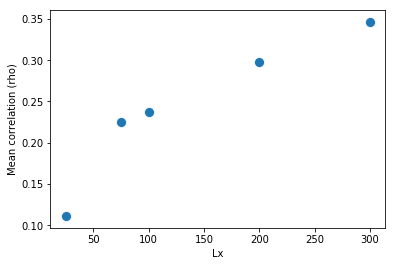

In [198]:
ax = sns.scatterplot(df_stats.Lx, df_stats.mean_corr, s=100)
ax.set(xlabel='Lx', ylabel='Mean correlation (rho)')

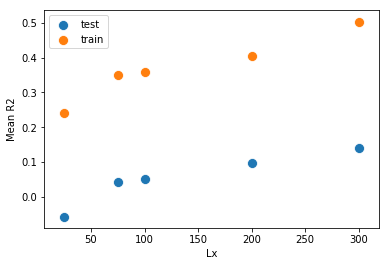

In [199]:
ax = sns.scatterplot(df_stats.Lx, df_stats.mean_R2_test, s=100)
ax = sns.scatterplot(df_stats.Lx, df_stats.mean_R2_train, s=100)
ax.set(xlabel='Lx', ylabel='Mean R2')
ax.legend(labels=['test', 'train'])

#### based on full model

In [200]:
df_stats = getStats('all')
df_stats

,Lx,recall_pct,mean_corr,mean_R2_test,mean_R2_train,n
0,25,0.665480,0.256757,0.068091,0.578205,562
1,75,0.853480,0.361275,0.104481,0.627492,546
2,100,0.882243,0.380047,0.109904,0.629350,535
3,200,0.911708,0.415252,0.104197,0.638537,521
4,300,0.910000,0.430339,0.108591,0.649487,500


[Text(0,0.5,'% targets with recall > 0.95'), Text(0.5,0,'Lx')]

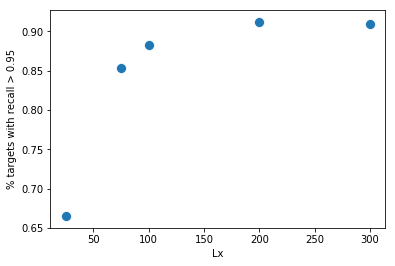

In [201]:
ax = sns.scatterplot(df_stats.Lx, df_stats.recall_pct, s=100)
ax.set(xlabel='Lx', ylabel='%% targets with recall > %s' % recall_cutoff)

[Text(0,0.5,'Mean correlation (rho)'), Text(0.5,0,'Lx')]

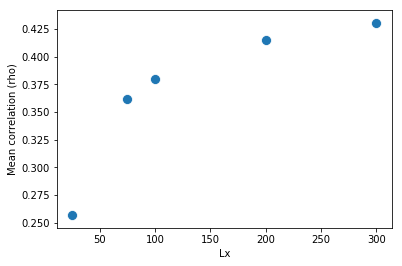

In [202]:
ax = sns.scatterplot(df_stats.Lx, df_stats.mean_corr, s=100)
ax.set(xlabel='Lx', ylabel='Mean correlation (rho)')

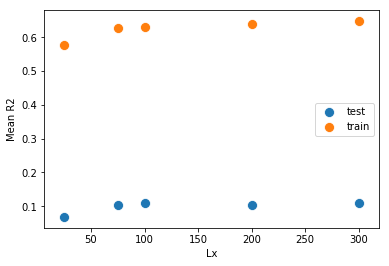

In [203]:
ax = sns.scatterplot(df_stats.Lx, df_stats.mean_R2_test, s=100)
ax = sns.scatterplot(df_stats.Lx, df_stats.mean_R2_train, s=100)
ax.set(xlabel='Lx', ylabel='Mean R2')
ax.legend(labels=['test', 'train'])